<a href="https://colab.research.google.com/github/chl-eo/CCDEPLRL_EXERCISES/blob/main/exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [57]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-04-22 07:27:18--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 13.200.41.135, 13.200.41.136, 13.200.41.134, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip.1’

fruits.zip.1        100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-04-22 07:27:26 (16.2 MB/s) - ‘fruits.zip.1’ saved [105946856/105946856]



In [69]:
!unzip fruits.zip

Archive:  fruits.zip
replace __MACOSX/._fruits? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Import the libraries

In [255]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [256]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [257]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 607 files belonging to 4 classes.
Found 110 files belonging to 4 classes.
Found 191 files belonging to 4 classes.


Display sample images from the dataset

In [258]:
!pip install Pillow
from PIL import Image

def convert_to_jpg(image_path):
    """Converts an image to JPEG format."""
    try:
        img = Image.open(image_path)
        if img.format != "JPEG":
            # Convert to RGB if necessary
            if img.mode != "RGB":
                img = img.convert("RGB")

            # Save as JPEG with original filename but .jpg extension
            new_path = image_path.rsplit('.', 1)[0] + '.jpg'
            img.save(new_path, "JPEG")
            print(f"Converted {image_path} to {new_path}")
            # Delete the original file if the conversion was successful
            import os
            os.remove(image_path)
        else:
            print(f"{image_path} is already a JPEG. Skipping.")
    except Exception as e:
        print(f"Error converting {image_path}: {e}")


import os
# Example usage: Convert all images in the "fruits/train" directory to JPEG
for dirpath, dirnames, filenames in os.walk("fruits/train"):
    for filename in filenames:
        image_path = os.path.join(dirpath, filename)
        convert_to_jpg(image_path)

# Repeat for validation and test directories
for dirpath, dirnames, filenames in os.walk("fruits/validation"):
    for filename in filenames:
        image_path = os.path.join(dirpath, filename)
        convert_to_jpg(image_path)

for dirpath, dirnames, filenames in os.walk("fruits/test"):
    for filename in filenames:
        image_path = os.path.join(dirpath, filename)
        convert_to_jpg(image_path)

Error converting fruits/train/.DS_Store: cannot identify image file 'fruits/train/.DS_Store'
fruits/train/orange/Screen Shot 2018-06-13 at 12.18.34 AM.jpg is already a JPEG. Skipping.
fruits/train/orange/Screen Shot 2018-06-13 at 12.06.01 AM.jpg is already a JPEG. Skipping.
fruits/train/orange/Screen Shot 2018-06-13 at 12.01.58 AM.jpg is already a JPEG. Skipping.
fruits/train/orange/Screen Shot 2018-06-13 at 12.11.02 AM.jpg is already a JPEG. Skipping.
fruits/train/orange/Screen Shot 2018-06-13 at 12.17.31 AM.jpg is already a JPEG. Skipping.
fruits/train/orange/Screen Shot 2018-06-13 at 12.11.57 AM.jpg is already a JPEG. Skipping.
fruits/train/orange/Screen Shot 2018-06-13 at 12.06.15 AM.jpg is already a JPEG. Skipping.
fruits/train/orange/Screen Shot 2018-06-13 at 12.03.17 AM.jpg is already a JPEG. Skipping.
fruits/train/orange/Screen Shot 2018-06-13 at 12.05.19 AM.jpg is already a JPEG. Skipping.
fruits/train/orange/Screen Shot 2018-06-13 at 12.04.34 AM.jpg is already a JPEG. Skippin

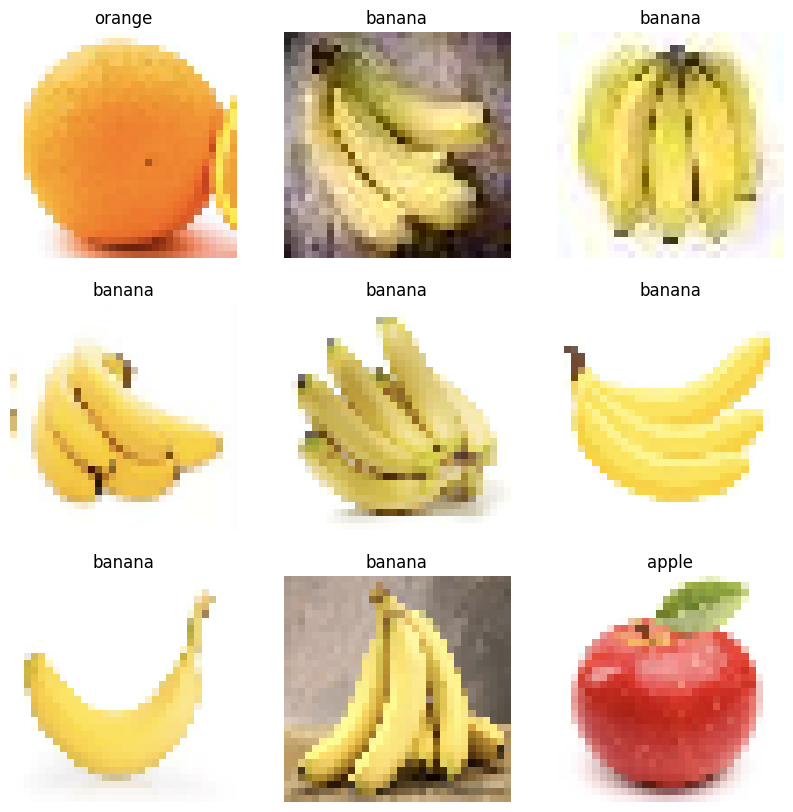

In [259]:
class_names = ["apple", "banana", "orange", "rambutan"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [260]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(4)
    ]
)

Define the optimizer and loss function

In [261]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Train the model

In [262]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.3568 - loss: 1.3370 - val_accuracy: 0.4909 - val_loss: 1.0388
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6167 - loss: 0.8321 - val_accuracy: 0.7818 - val_loss: 0.4185
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7514 - loss: 0.5992 - val_accuracy: 0.7182 - val_loss: 0.7045
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8216 - loss: 0.4883 - val_accuracy: 0.8273 - val_loss: 0.3290
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8770 - loss: 0.3113 - val_accuracy: 0.8545 - val_loss: 0.3070
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8757 - loss: 0.3056 - val_accuracy: 0.8545 - val_loss: 0.3228
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8557 - loss: 0.3932 - val_accuracy: 0.9091 - val_loss: 0.1930
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8950 - loss: 0.2987 - val_accuracy: 0.9000 - 

Test the model

In [263]:
for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    for i in range(len(labels)):
        true = labels[i].numpy()
        pred = predicted_labels[i]
        if true != pred:
            class_name = class_names[true]
            img_array = tf.keras.preprocessing.image.array_to_img(images[i])
            save_path = f"fruits/train/{class_name}/fixed_{class_name}_{i}.jpg"
            img_array.save(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


In [264]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 1.0000 - loss: 0.0219


[0.02849557437002659, 1.0]

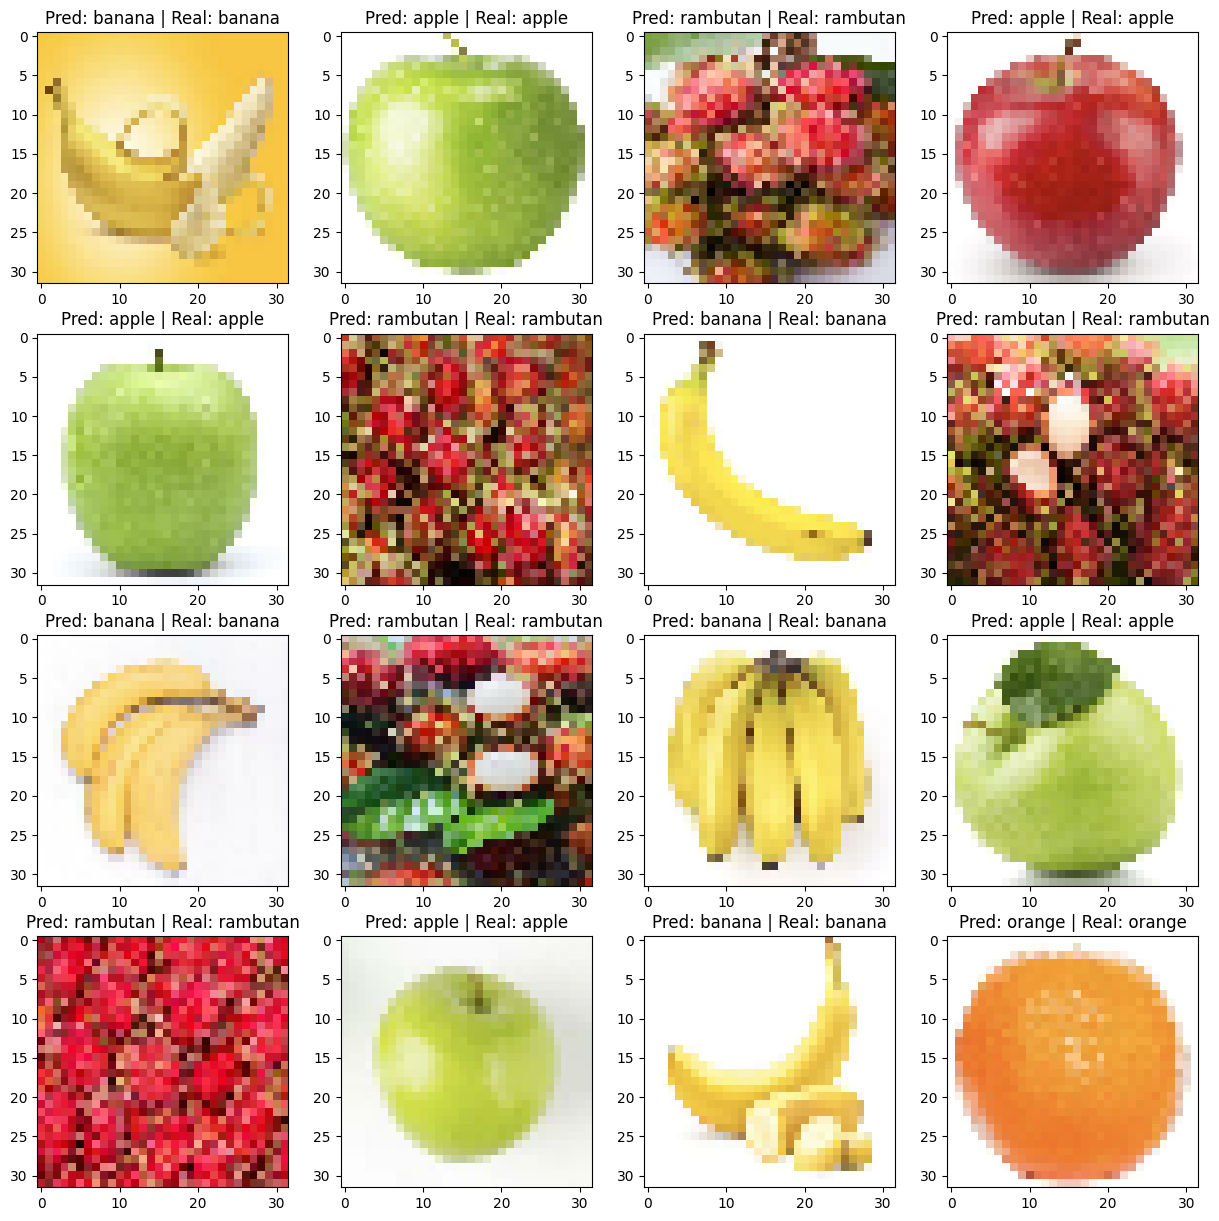

In [265]:
import numpy

plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [266]:
model.save('fruitmodel.keras')